# Phase 2 Notebook

In [1]:
import helperFunctions
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras.utils as kutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder as le

## Step 1: Data Importing
This step creates a dataframe with start, end, (cycle start end) crackles, wheezes, pid, and filename

In [2]:
completeData = helperFunctions.getCompleteData()
completeData

,start,end,crackles,wheezes,pid,filename
0,0.022,0.364,0,0,148,148_1b1_Al_sc_Meditron
1,0.364,2.436,0,0,148,148_1b1_Al_sc_Meditron
2,2.436,4.636,0,0,148,148_1b1_Al_sc_Meditron
3,4.636,6.793,0,0,148,148_1b1_Al_sc_Meditron
4,6.793,8.750,0,0,148,148_1b1_Al_sc_Meditron
...,...,...,...,...,...,...
6893,16.946,19.156,1,0,130,130_2b3_Al_mc_AKGC417L
6894,0.022,3.450,0,0,116,116_1b2_Pl_sc_Meditron
6895,3.450,10.507,0,1,116,116_1b2_Pl_sc_Meditron
6896,10.507,17.336,0,1,116,116_1b2_Pl_sc_Meditron


## Step 2: Data Preprocessing
This step splits the audio into cycles and updates the dataframe with the new filenames. In order to split up audio, we must choose a standard length for all audio samples, however a sample too large would be difficult to process and a sample too small may eliminate too much data. We chose 6 seconds as a standard length for all audio samples (see figure).

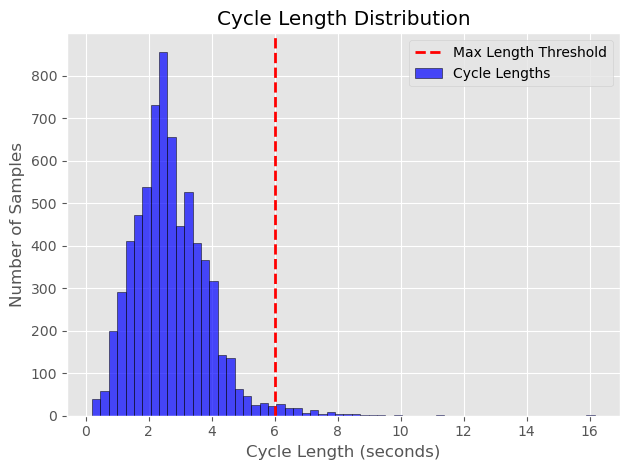

98.27 percent of cycles are less than 6 seconds long


In [3]:
helperFunctions.getCycleGraph(completeData, maxLength=6)

In [4]:
# this will take a long time (~20 minutes)
splitData = helperFunctions.getSplitData(completeData, maxLength=6)
splitData

,start,end,crackles,wheezes,pid,filename
0,0.022,0.364,0,0,148,148_1b1_Al_sc_Meditron_0.wav
1,0.364,2.436,0,0,148,148_1b1_Al_sc_Meditron_1.wav
2,2.436,4.636,0,0,148,148_1b1_Al_sc_Meditron_2.wav
3,4.636,6.793,0,0,148,148_1b1_Al_sc_Meditron_3.wav
4,6.793,8.750,0,0,148,148_1b1_Al_sc_Meditron_4.wav
...,...,...,...,...,...,...
6893,16.946,19.156,1,0,130,130_2b3_Al_mc_AKGC417L_8.wav
6894,0.022,3.450,0,0,116,116_1b2_Pl_sc_Meditron_0.wav
6895,3.450,10.507,0,1,116,116_1b2_Pl_sc_Meditron_1.wav
6896,10.507,17.336,0,1,116,116_1b2_Pl_sc_Meditron_2.wav


## Step 3: Data Categorization and Division
this step adds categories to each cycle based on the presence of crackles and wheezes. The categories are as follows: none, crackles only, wheezes only, and both crackles and wheezes. The categories are added to the dataframe as a new column. Furthermore, the data is divided into training and testing sets based on each category. As seen in the "Category Distribution" figure, the dataset is imbalanced.

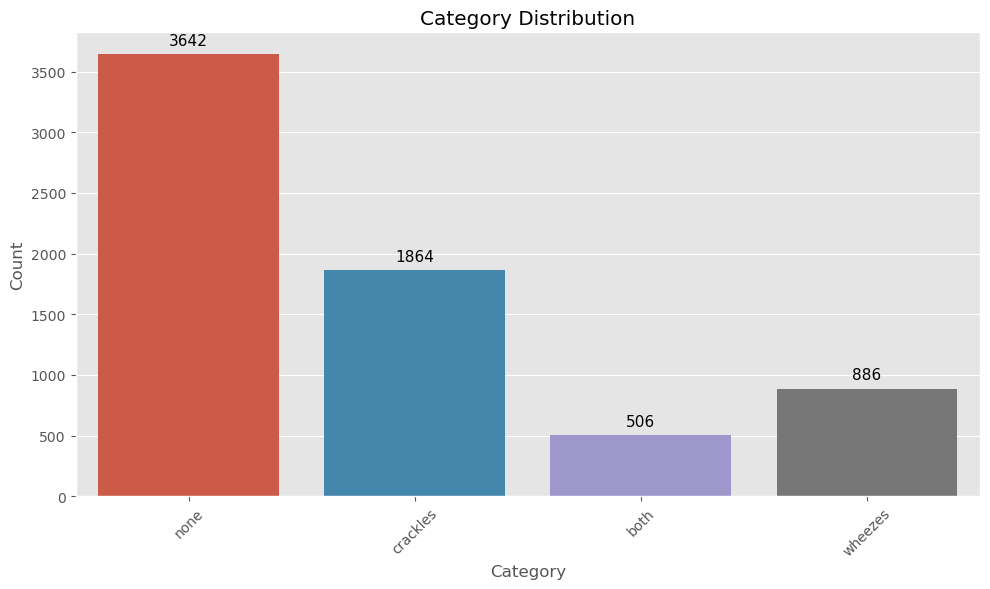

,start,end,crackles,wheezes,pid,filename,category
0,0.022,0.364,0,0,148,148_1b1_Al_sc_Meditron_0.wav,none
1,0.364,2.436,0,0,148,148_1b1_Al_sc_Meditron_1.wav,none
2,2.436,4.636,0,0,148,148_1b1_Al_sc_Meditron_2.wav,none
3,4.636,6.793,0,0,148,148_1b1_Al_sc_Meditron_3.wav,none
4,6.793,8.750,0,0,148,148_1b1_Al_sc_Meditron_4.wav,none
...,...,...,...,...,...,...,...
6893,16.946,19.156,1,0,130,130_2b3_Al_mc_AKGC417L_8.wav,crackles
6894,0.022,3.450,0,0,116,116_1b2_Pl_sc_Meditron_0.wav,none
6895,3.450,10.507,0,1,116,116_1b2_Pl_sc_Meditron_1.wav,wheezes
6896,10.507,17.336,0,1,116,116_1b2_Pl_sc_Meditron_2.wav,wheezes


In [5]:
categorizedData = helperFunctions.getCategorizedData(splitData)
categorizedData

In [6]:
trainData, testData = helperFunctions.getTestTrainSplit(categorizedData, testSize=0.2)


Training data category distribution:
category
none        0.527909
crackles    0.270207
wheezes     0.128489
both        0.073396
Name: count, dtype: float64
total: 5518


Test data category distribution:
category
none        0.528261
crackles    0.270290
wheezes     0.128261
both        0.073188
Name: count, dtype: float64
total: 1380


## Step 4: Feature Extraction and Modeling
This creates CNN and RNN models for three different features, MFCC, STFT, and Mel-Spectrogram which are all ways of compressing audio information. Furthermore, this step creates a dense network, combining all three features into a singular CNN and RNN models.

### Step 4.1: Mel-Frequency Cepstral Coefficients (MFCC)

In [7]:
mfccCnnModel, mfccRnnModel, mfccTrain, mfccTest = helperFunctions.getMFCCModel(trainData, testData)

2023-12-05 11:07:13.412159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:07:13.412560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:07:13.412915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

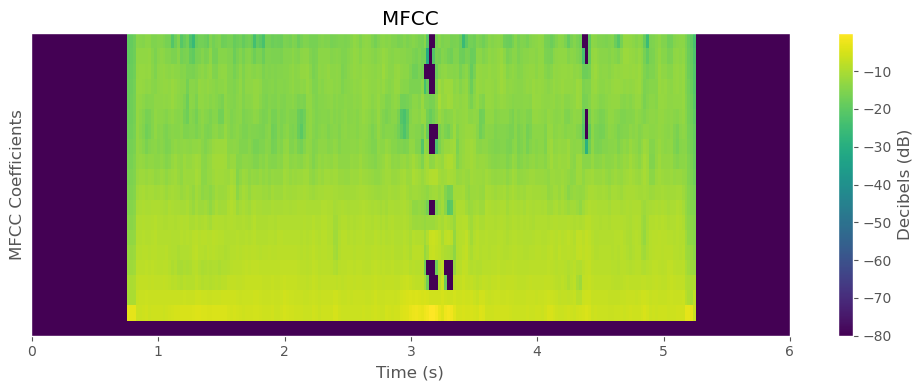

In [8]:
helperFunctions.createMFCCPlot(mfccTrain, index=420)

#### Step 4.1.1: MFCC CNN Model

In [9]:
mfccCnnModel.summary()

Model: "mfccCnnModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfccCnnIn (InputLayer)      [(None, 20, 259, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 20, 87, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 20, 87, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20, 87, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 43, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 22, 64)       

#### Step 4.1.2: MFCC RNN Model

In [10]:
mfccRnnModel.summary()

Model: "mfccRnnModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfccRnnIn (InputLayer)      [(None, 20, 259)]         0         
                                                                 
 lstm (LSTM)                 (None, 20, 128)           198656    
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 batch_normalization_4 (Batc  (None, 20, 128)          512       
 hNormalization)                                                 
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 20, 128)           0         
                                                      

### Step 4.2: Short-Time Fourier Transform (STFT)

In [11]:
stftCnnModel, stftRnnModel, stftTrain, stftTest = helperFunctions.getSTFTModel(trainData, testData)

2023-12-05 11:08:37.626810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:08:37.628379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:08:37.629254: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

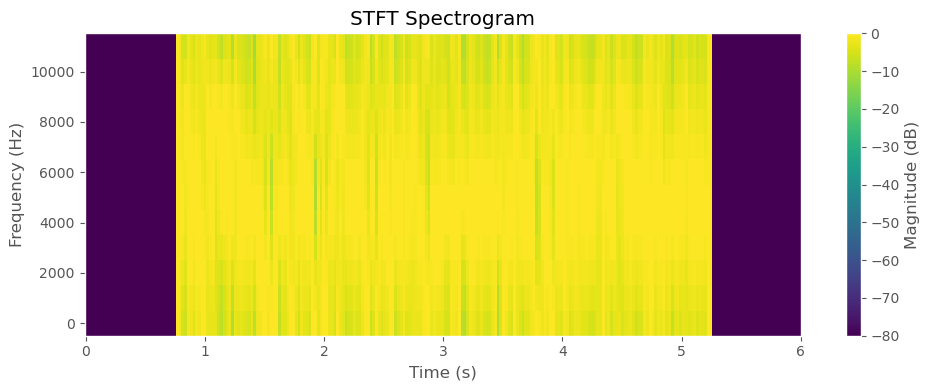

In [12]:
helperFunctions.createSTFTPlot(stftTrain, index=420)

#### Step 4.2.1: STFT CNN Model

In [13]:
stftCnnModel.summary()

Model: "stftCnnModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 stftCnnIn (InputLayer)      [(None, 12, 259, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 87, 32)        832       
                                                                 
 batch_normalization_7 (Batc  (None, 12, 87, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 12, 87, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 43, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 22, 64)        

#### Step 4.2.2: STFT RNN Model

In [14]:
stftRnnModel.summary()

Model: "stftRnnModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 stftRnnIn (InputLayer)      [(None, 12, 259)]         0         
                                                                 
 lstm_3 (LSTM)               (None, 12, 128)           198656    
                                                                 
 dropout_4 (Dropout)         (None, 12, 128)           0         
                                                                 
 batch_normalization_10 (Bat  (None, 12, 128)          512       
 chNormalization)                                                
                                                                 
 lstm_4 (LSTM)               (None, 12, 128)           131584    
                                                                 
 dropout_5 (Dropout)         (None, 12, 128)           0         
                                                      

### Step 4.3: Mel-Spectrogram

In [15]:
melCnnModel, melRnnModel, melTrain, melTest = helperFunctions.getMELModel(trainData, testData)

2023-12-05 11:09:24.664105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:09:24.665542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:09:24.666676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

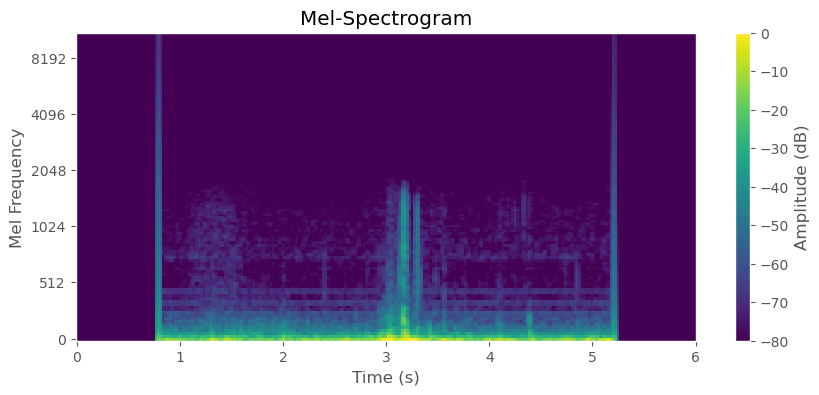

In [16]:
helperFunctions.createMELPlot(melTrain, index=420)

#### Step 4.3.1: Mel-Spectrogram CNN Model

In [17]:
melCnnModel.summary()

Model: "melCnnModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 melCnnIn (InputLayer)       [(None, 128, 259, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 87, 32)        832       
                                                                 
 batch_normalization_13 (Bat  (None, 64, 87, 32)       128       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 64, 87, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 22, 64)        

#### Step 4.3.2: Mel-Spectrogram RNN Model

In [18]:
melRnnModel.summary()

Model: "melRnnModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 melRnnIn (InputLayer)       [(None, 128, 259)]        0         
                                                                 
 lstm_6 (LSTM)               (None, 128, 128)          198656    
                                                                 
 dropout_8 (Dropout)         (None, 128, 128)          0         
                                                                 
 batch_normalization_17 (Bat  (None, 128, 128)         512       
 chNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 128, 128)          131584    
                                                                 
 dropout_9 (Dropout)         (None, 128, 128)          0         
                                                       

### Step 4.4: Dense Network

#### Step 4.4.1: Dense CNN Model

In [19]:
denseCnnModel = helperFunctions.getDenseModel(mfccCnnModel, stftCnnModel, melCnnModel)

In [20]:
denseCnnModel.summary()

Model: "DenseModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mfcc (InputLayer)              [(None, 20, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 stft (InputLayer)              [(None, 12, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 mel (InputLayer)               [(None, 128, 259, 1  0           []                               
                                )]                                                       

#### Step 4.4.2: Dense RNN Model

In [21]:
denseRnnModel = helperFunctions.getDenseModel(mfccRnnModel, stftRnnModel, melRnnModel)

2023-12-05 11:09:25.165162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:09:25.165804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:09:25.166269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [22]:
denseRnnModel.summary()

Model: "DenseModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mfcc (InputLayer)              [(None, 20, 259)]    0           []                               
                                                                                                  
 stft (InputLayer)              [(None, 12, 259)]    0           []                               
                                                                                                  
 mel (InputLayer)               [(None, 128, 259)]   0           []                               
                                                                                                  
 mfccRnnModel (Functional)      (None, 4)            471876      ['mfcc[0][0]']                   
                                                                                         

#### Step 4.4.3: Dense Combined Model

In [23]:
denseCombinedModel = helperFunctions.getDenseModel2(mfccCnnModel, stftCnnModel, melCnnModel, mfccRnnModel, stftRnnModel, melRnnModel)

2023-12-05 11:09:25.873587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:09:25.874160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:09:25.874735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [24]:
denseCombinedModel.summary()

Model: "DenseCombinedModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mfccCnnIn (InputLayer)         [(None, 20, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 stftCnnIn (InputLayer)         [(None, 12, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 melCnnIn (InputLayer)          [(None, 128, 259, 1  0           []                               
                                )]                                               

## Step 5: Data Training
This step uses the models created in step 4 and trains them on the training data. The training data is then tested on the testing data and the results are plotted. Figures showing the accuracy and loss of each model are shown below.

In [25]:
dtr, dte = helperFunctions.encode(trainData.category, testData.category)

### Step 5.1: MFCC

#### Step 5.1.1: MFCC CNN

In [26]:
mfccCnnModel, mfccCnnHistory = helperFunctions.trainModel(mfccCnnModel, dtr, dte, mfccTrain, mfccTest)

Epoch 1/100


2023-12-05 11:09:26.616164: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


173/173 [==============================] - 4s 23ms/step - loss: 3.6970 - accuracy: 0.1999 - val_loss: 4.4348 - val_accuracy: 0.0022 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 4s 22ms/step - loss: 2.0870 - accuracy: 0.4411 - val_loss: 1.7108 - val_accuracy: 0.4290 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 4s 21ms/step - loss: 1.8470 - accuracy: 0.4893 - val_loss: 1.5281 - val_accuracy: 0.4870 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 4s 22ms/step - loss: 1.6798 - accuracy: 0.5042 - val_loss: 1.4655 - val_accuracy: 0.5239 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 4s 23ms/step - loss: 1.5191 - accuracy: 0.5176 - val_loss: 1.2876 - val_accuracy: 0.4696 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 4s 23ms/step - loss: 1.1578 - accuracy: 0.5337 - val_loss: 1.1243 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 4s 20ms/step - 

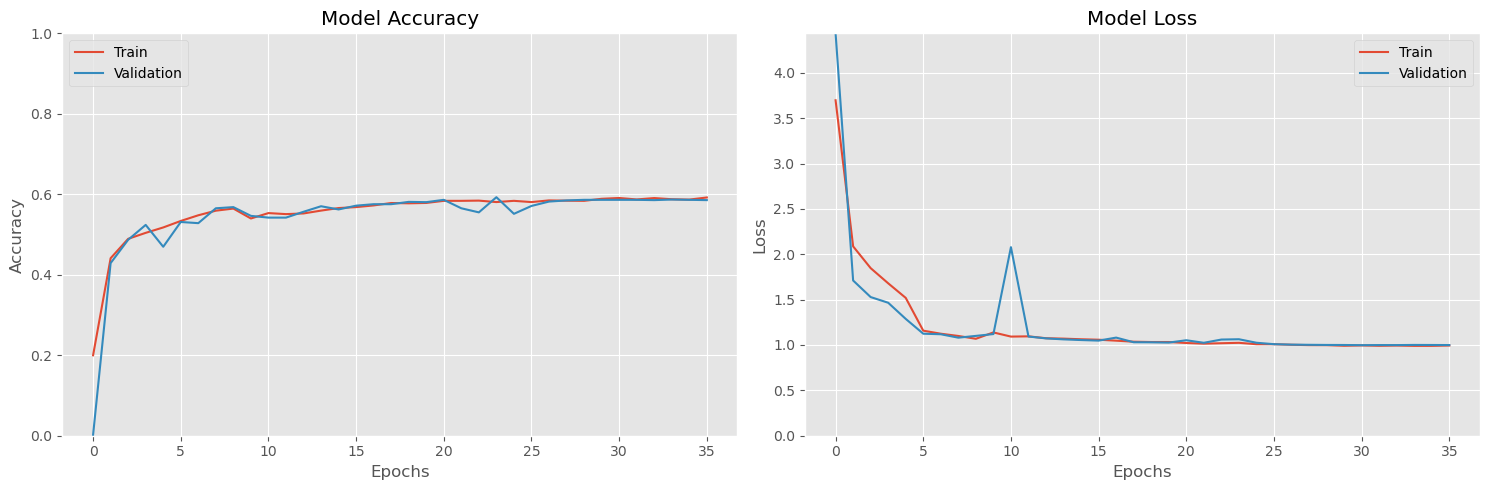

In [27]:
helperFunctions.plotModel(mfccCnnHistory)

In [28]:
mfccCnnModel.evaluate(mfccTest, dte)

44/44 [==============================] - 0s 9ms/step - loss: 0.9992 - accuracy: 0.5855


[0.9991757869720459, 0.5855072736740112]

#### Step 5.1.2: MFCC RNN

In [29]:
mfccRnnModel, mfccRnnHistory = helperFunctions.trainModel(mfccRnnModel, dtr, dte, mfccTrain, mfccTest)

Epoch 1/100


2023-12-05 11:11:47.475955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:11:47.476795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:11:47.477554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - ETA: 0s - loss: 1.3354 - accuracy: 0.4426

2023-12-05 11:11:59.646841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:11:59.647832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:11:59.648504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - 13s 65ms/step - loss: 1.3354 - accuracy: 0.4426 - val_loss: 1.1290 - val_accuracy: 0.5348 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 11s 65ms/step - loss: 1.1804 - accuracy: 0.4973 - val_loss: 1.1357 - val_accuracy: 0.5181 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 11s 62ms/step - loss: 1.1212 - accuracy: 0.5174 - val_loss: 1.0878 - val_accuracy: 0.5355 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 10s 56ms/step - loss: 1.0817 - accuracy: 0.5314 - val_loss: 1.1436 - val_accuracy: 0.5420 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 11s 62ms/step - loss: 1.0516 - accuracy: 0.5507 - val_loss: 1.0541 - val_accuracy: 0.5522 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 10s 61ms/step - loss: 1.0298 - accuracy: 0.5634 - val_loss: 1.0564 - val_accuracy: 0.5522 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 10s 60ms/

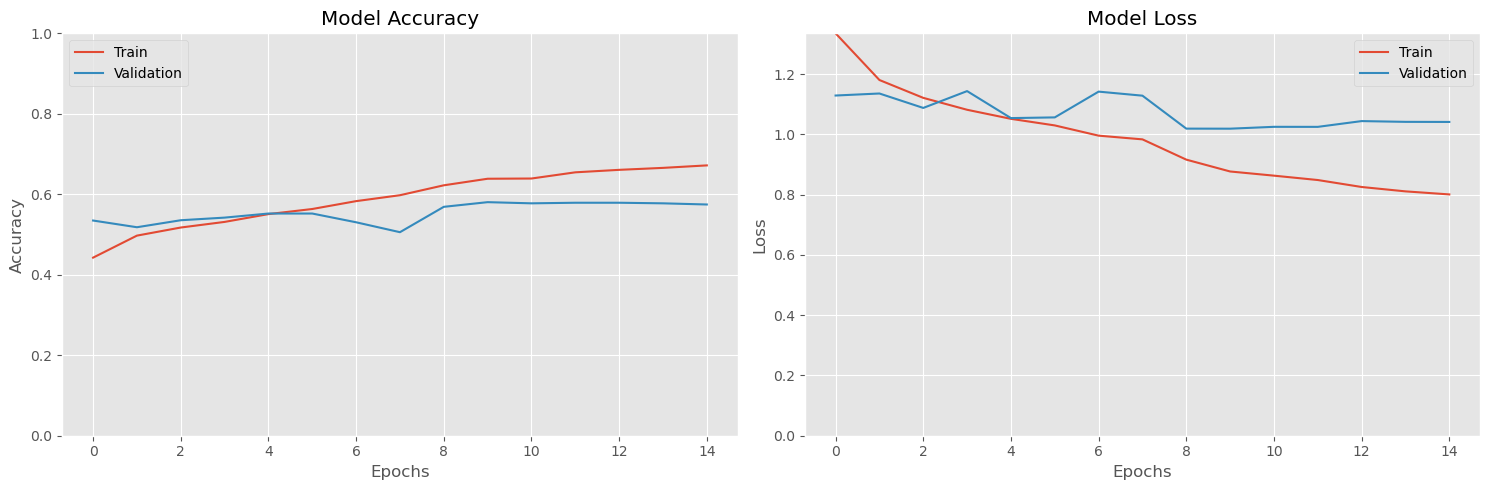

In [30]:
helperFunctions.plotModel(mfccRnnHistory)

In [31]:
mfccRnnModel.evaluate(mfccTest, dte)

44/44 [==============================] - 1s 14ms/step - loss: 1.0413 - accuracy: 0.5746


[1.0412973165512085, 0.5746376514434814]

### Step 5.2: STFT

#### Step 5.2.1: STFT CNN

In [32]:
stftCnnModel, stftCnnHistory = helperFunctions.trainModel(stftCnnModel, dtr, dte, stftTrain, stftTest)

Epoch 1/100
173/173 [==============================] - 3s 14ms/step - loss: 4.0340 - accuracy: 0.0194 - val_loss: 2.7763 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 2s 13ms/step - loss: 2.0196 - accuracy: 0.0839 - val_loss: 2.0959 - val_accuracy: 0.2210 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 2s 13ms/step - loss: 1.7805 - accuracy: 0.0941 - val_loss: 1.7640 - val_accuracy: 0.3899 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 2s 13ms/step - loss: 1.7445 - accuracy: 0.2900 - val_loss: 1.7284 - val_accuracy: 0.2449 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 2s 13ms/step - loss: 1.4326 - accuracy: 0.4667 - val_loss: 1.3915 - val_accuracy: 0.5275 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 2s 13ms/step - loss: 1.1779 - accuracy: 0.5252 - val_loss: 1.1358 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 2s 

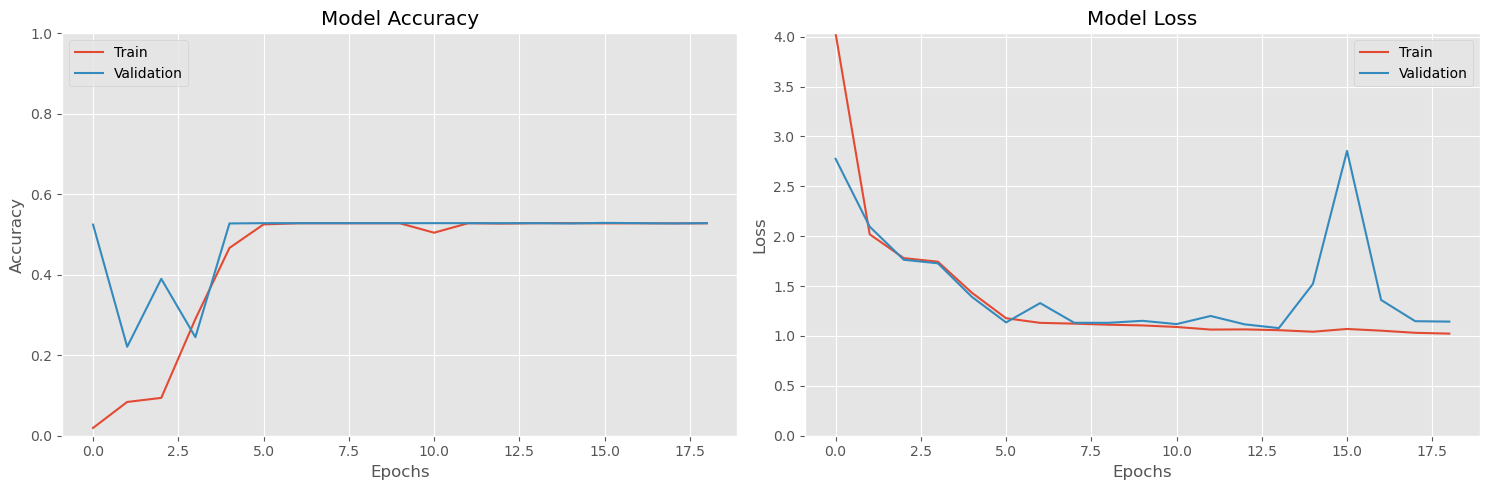

In [33]:
helperFunctions.plotModel(stftCnnHistory)

In [34]:
stftCnnModel.evaluate(stftTest, dte)

44/44 [==============================] - 0s 5ms/step - loss: 1.1442 - accuracy: 0.5283


[1.1441740989685059, 0.5282608866691589]

#### Step 5.2.2: STFT RNN

In [35]:
stftRnnModel, stftRnnHistory = helperFunctions.trainModel(stftRnnModel, dtr, dte, stftTrain, stftTest)

Epoch 1/100


2023-12-05 11:15:07.717565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:15:07.718346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:15:07.718925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - ETA: 0s - loss: 1.3760 - accuracy: 0.4331

2023-12-05 11:15:16.157912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:15:16.158546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:15:16.159258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - 9s 41ms/step - loss: 1.3760 - accuracy: 0.4331 - val_loss: 1.1516 - val_accuracy: 0.5210 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 6s 37ms/step - loss: 1.2023 - accuracy: 0.4860 - val_loss: 1.1322 - val_accuracy: 0.5290 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 6s 37ms/step - loss: 1.1562 - accuracy: 0.4918 - val_loss: 1.1766 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 6s 36ms/step - loss: 1.1372 - accuracy: 0.5109 - val_loss: 1.1135 - val_accuracy: 0.5217 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 7s 38ms/step - loss: 1.1116 - accuracy: 0.5181 - val_loss: 1.2141 - val_accuracy: 0.4891 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 6s 37ms/step - loss: 1.1079 - accuracy: 0.5217 - val_loss: 1.0961 - val_accuracy: 0.5355 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 7s 38ms/step - 

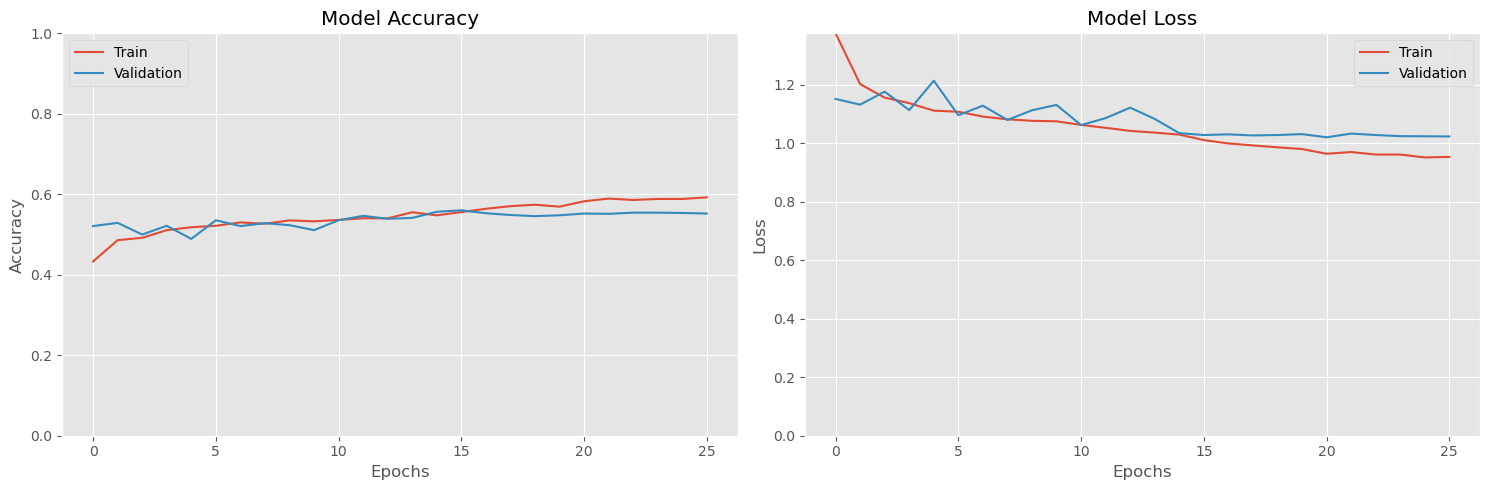

In [36]:
helperFunctions.plotModel(stftRnnHistory)

In [37]:
stftRnnModel.evaluate(stftTest, dte)

44/44 [==============================] - 0s 10ms/step - loss: 1.0234 - accuracy: 0.5522


[1.0233595371246338, 0.552173912525177]

### Step 5.3: Mel

#### Step 5.3.1: Mel-Spectrogram CNN

In [38]:
melCnnModel, melCnnHistory = helperFunctions.trainModel(melCnnModel, dtr, dte, melTrain, melTest)

Epoch 1/100
173/173 [==============================] - 7s 38ms/step - loss: 3.3690 - accuracy: 0.2283 - val_loss: 1.7533 - val_accuracy: 0.4116 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 6s 37ms/step - loss: 1.6569 - accuracy: 0.4851 - val_loss: 1.2505 - val_accuracy: 0.5036 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 6s 37ms/step - loss: 1.1414 - accuracy: 0.5225 - val_loss: 1.1324 - val_accuracy: 0.5246 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 6s 38ms/step - loss: 1.1218 - accuracy: 0.5188 - val_loss: 1.1195 - val_accuracy: 0.5116 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 6s 37ms/step - loss: 1.1221 - accuracy: 0.5252 - val_loss: 1.1168 - val_accuracy: 0.5254 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 6s 37ms/step - loss: 1.1105 - accuracy: 0.5286 - val_loss: 1.1842 - val_accuracy: 0.5261 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 7s 

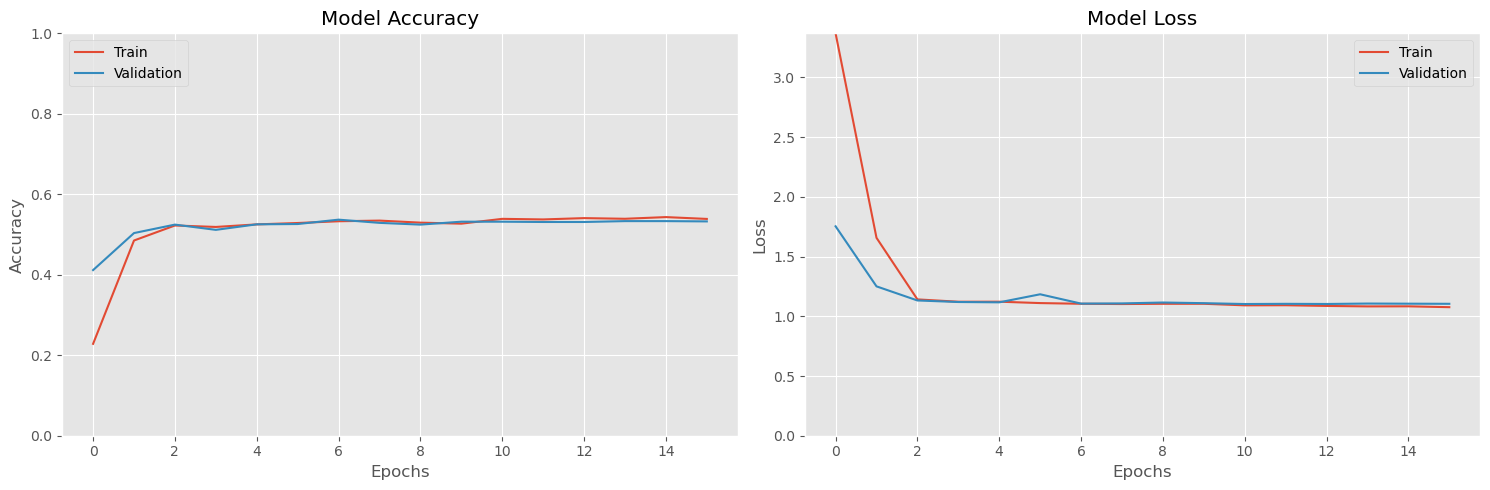

In [39]:
helperFunctions.plotModel(melCnnHistory)

In [40]:
melCnnModel.evaluate(melTest, dte)

44/44 [==============================] - 1s 13ms/step - loss: 1.1045 - accuracy: 0.5326


[1.1044667959213257, 0.532608687877655]

#### Step 5.3.2: Mel-Spectrogram RNN

In [41]:
melRnnModel, melRnnHistory = helperFunctions.trainModel(melRnnModel, dtr, dte, melTrain, melTest)

Epoch 1/100


2023-12-05 11:19:45.456390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:19:45.457039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:19:45.457779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - ETA: 0s - loss: 1.4391 - accuracy: 0.4083

2023-12-05 11:20:42.366934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:20:42.367444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:20:42.368606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - 61s 341ms/step - loss: 1.4391 - accuracy: 0.4083 - val_loss: 1.2487 - val_accuracy: 0.2688 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 58s 336ms/step - loss: 1.2689 - accuracy: 0.4725 - val_loss: 1.1815 - val_accuracy: 0.5275 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 52s 301ms/step - loss: 1.2160 - accuracy: 0.4831 - val_loss: 1.1668 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 52s 303ms/step - loss: 1.1997 - accuracy: 0.5018 - val_loss: 1.1913 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 50s 287ms/step - loss: 1.1883 - accuracy: 0.5190 - val_loss: 1.2008 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 50s 290ms/step - loss: 1.1744 - accuracy: 0.5199 - val_loss: 1.1558 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 53s

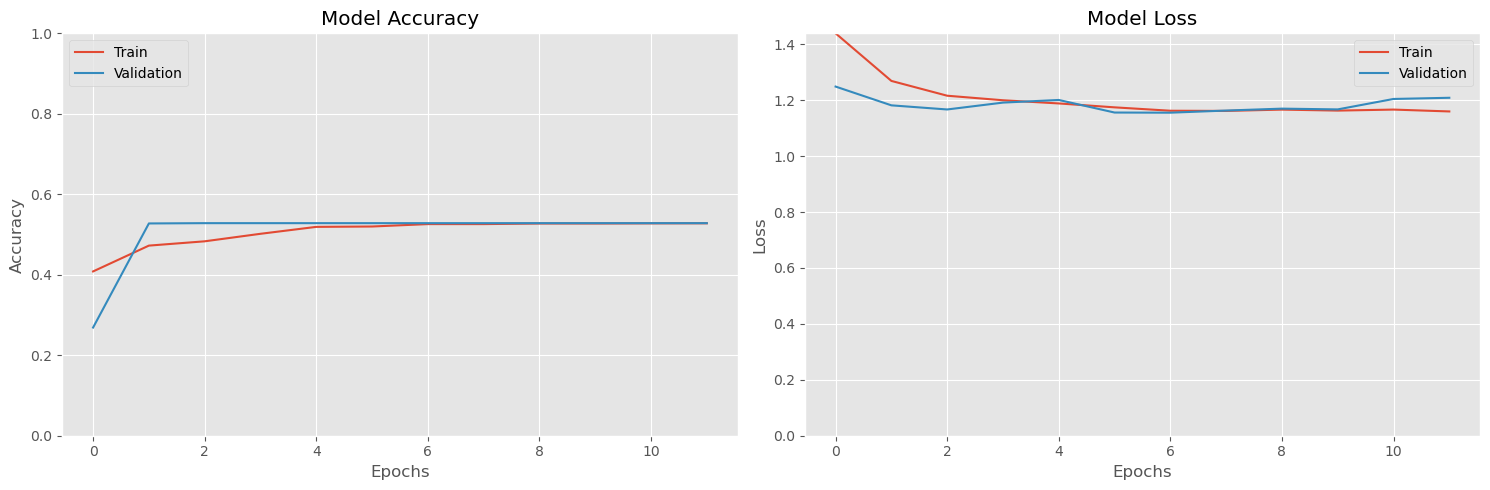

In [42]:
helperFunctions.plotModel(melRnnHistory)

In [43]:
melRnnModel.evaluate(melTest, dte)

44/44 [==============================] - 3s 73ms/step - loss: 1.2086 - accuracy: 0.5283


[1.2085957527160645, 0.5282608866691589]

### Step 5.4: Dense

#### Step 5.4.1: Dense CNN

In [44]:
denseCnnModel, denseCnnHistory = helperFunctions.trainModel(denseCnnModel, dtr, dte, [mfccTrain, stftTrain, melTrain], [mfccTest, stftTest, melTest])

Epoch 1/100
173/173 [==============================] - 10s 48ms/step - loss: 1.3159 - accuracy: 0.5024 - val_loss: 1.1619 - val_accuracy: 0.5580 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 8s 48ms/step - loss: 1.1093 - accuracy: 0.5596 - val_loss: 1.0108 - val_accuracy: 0.5783 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 8s 47ms/step - loss: 1.0351 - accuracy: 0.5719 - val_loss: 0.9944 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 8s 47ms/step - loss: 0.9862 - accuracy: 0.5839 - val_loss: 1.0558 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 8s 48ms/step - loss: 0.9456 - accuracy: 0.6069 - val_loss: 0.9363 - val_accuracy: 0.6159 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 8s 49ms/step - loss: 0.8996 - accuracy: 0.6290 - val_loss: 0.8914 - val_accuracy: 0.6304 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 9s

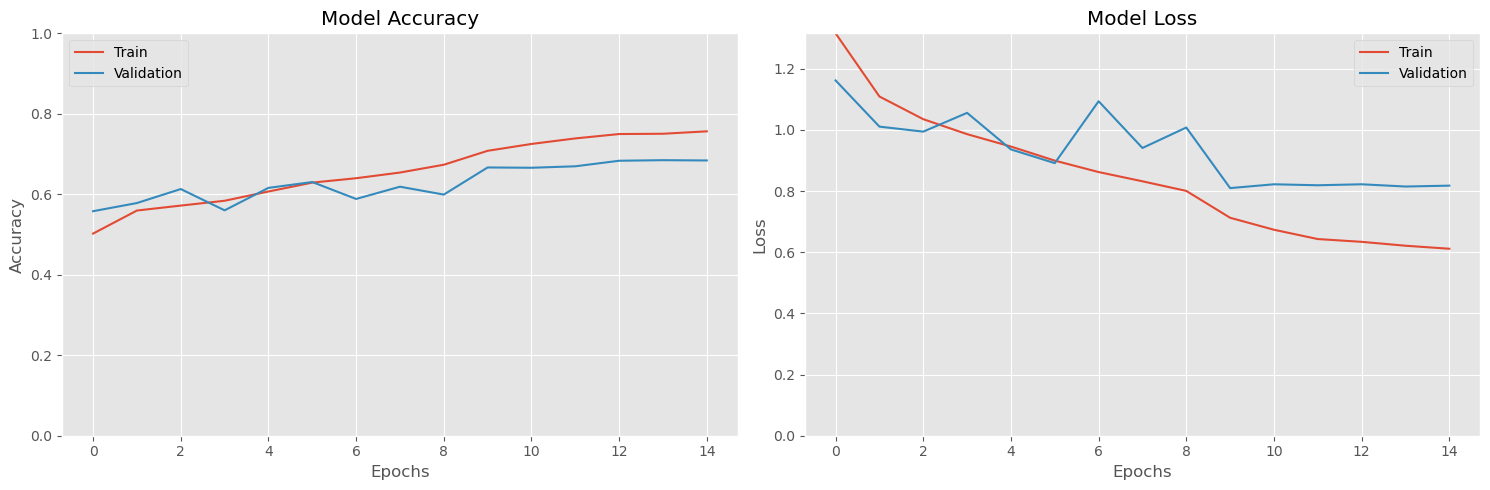

In [45]:
helperFunctions.plotModel(denseCnnHistory)

In [46]:
denseCnnModel.evaluate([mfccTest, stftTest, melTest], dte)

44/44 [==============================] - 1s 15ms/step - loss: 0.8178 - accuracy: 0.6841


[0.8177890181541443, 0.6840579509735107]

44/44 [==============================] - 1s 16ms/step
Confusion Matrix:
 [[ 26  30  18  27]
 [  7 235 126   5]
 [  2  93 601  33]
 [ 12  12  71  82]]


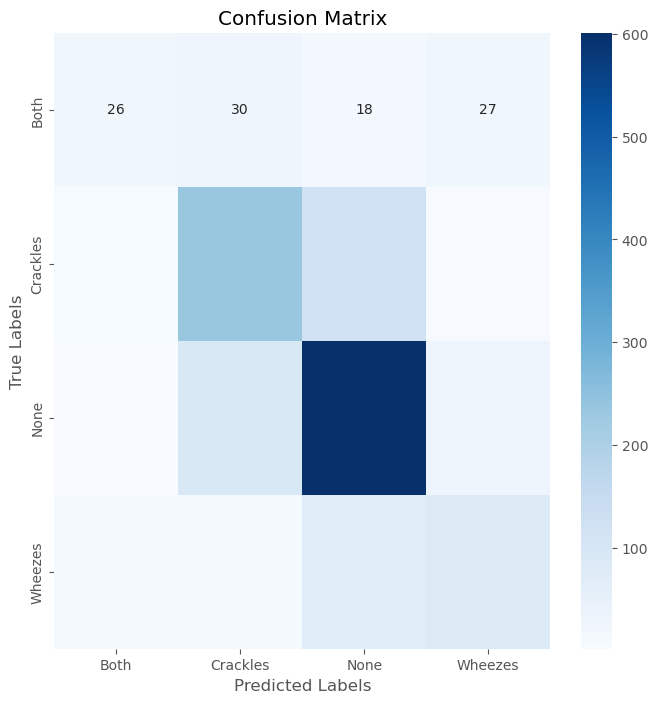

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.26      0.35       101
           1       0.64      0.63      0.63       373
           2       0.74      0.82      0.78       729
           3       0.56      0.46      0.51       177

    accuracy                           0.68      1380
   macro avg       0.62      0.54      0.57      1380
weighted avg       0.67      0.68      0.67      1380



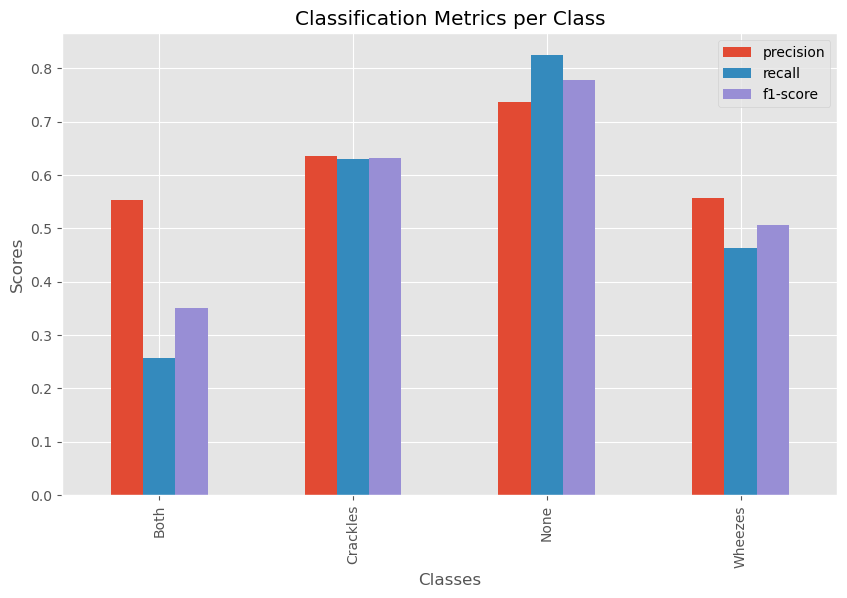

In [47]:
helperFunctions.plotClassificationAndConfusion(denseCnnModel, [mfccTest, stftTest, melTest], dte)

#### Step 5.4.2: Dense RNN

In [48]:
denseRnnModel, denseRnnHistory = helperFunctions.trainModel(denseRnnModel, dtr, dte, [mfccTrain, stftTrain, melTrain], [mfccTest, stftTest, melTest])

Epoch 1/100


2023-12-05 11:32:20.432250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:32:20.433112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:32:20.433830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - ETA: 0s - loss: 1.4256 - accuracy: 0.4614

2023-12-05 11:33:10.933357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:33:10.934188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:33:10.934693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - 55s 283ms/step - loss: 1.4256 - accuracy: 0.4614 - val_loss: 1.1922 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 47s 272ms/step - loss: 1.1376 - accuracy: 0.5239 - val_loss: 1.0739 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 48s 278ms/step - loss: 1.0866 - accuracy: 0.5435 - val_loss: 1.0854 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 47s 269ms/step - loss: 1.0495 - accuracy: 0.5632 - val_loss: 1.0951 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 47s 272ms/step - loss: 1.0420 - accuracy: 0.5609 - val_loss: 1.0678 - val_accuracy: 0.5181 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 47s 274ms/step - loss: 1.0170 - accuracy: 0.5739 - val_loss: 1.0402 - val_accuracy: 0.5514 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 47s

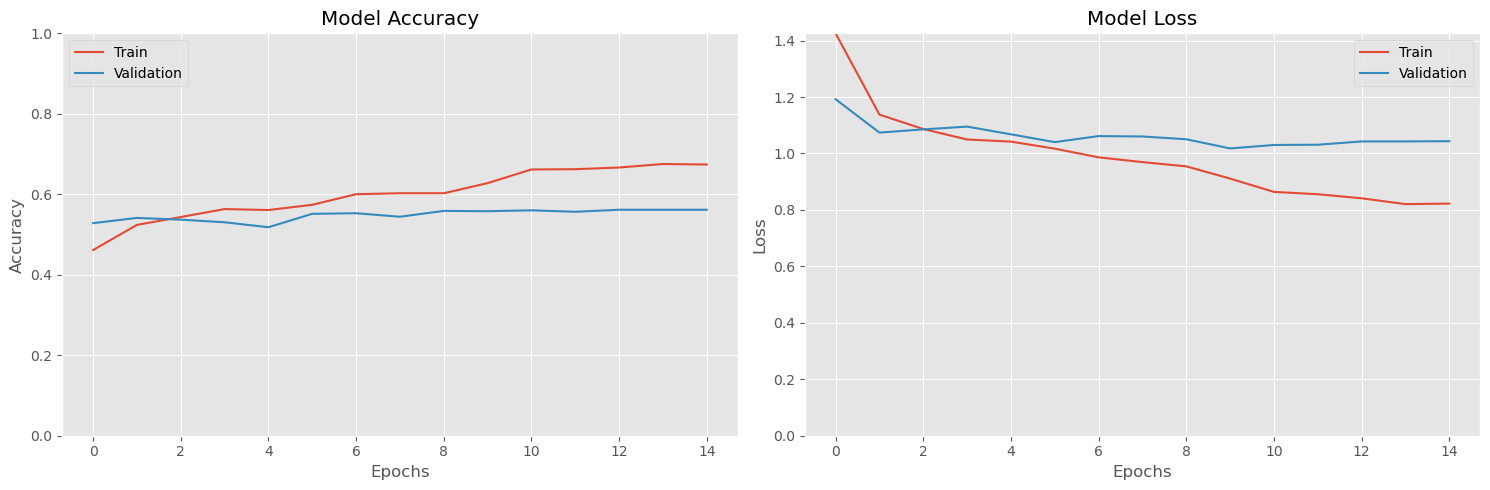

In [49]:
helperFunctions.plotModel(denseRnnHistory)

In [50]:
denseRnnModel.evaluate([mfccTest, stftTest, melTest], dte)

44/44 [==============================] - 3s 71ms/step - loss: 1.0435 - accuracy: 0.5616


[1.0435137748718262, 0.5615941882133484]

2023-12-05 11:44:17.590159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:44:17.591055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:44:17.591687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

44/44 [==============================] - 4s 69ms/step
Confusion Matrix:
 [[  0  22  34  45]
 [  0 176 174  23]
 [  0 140 527  62]
 [  0  19  86  72]]


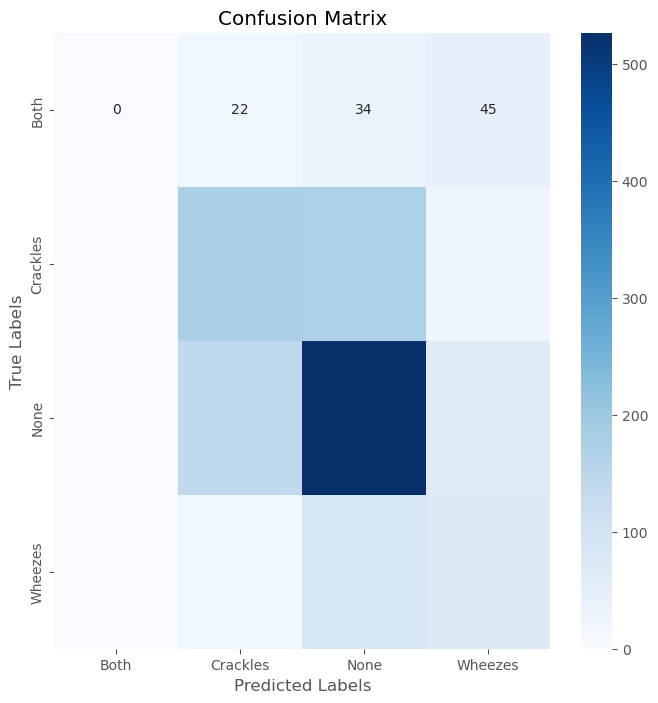

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.49      0.47      0.48       373
           2       0.64      0.72      0.68       729
           3       0.36      0.41      0.38       177

    accuracy                           0.56      1380
   macro avg       0.37      0.40      0.39      1380
weighted avg       0.52      0.56      0.54      1380



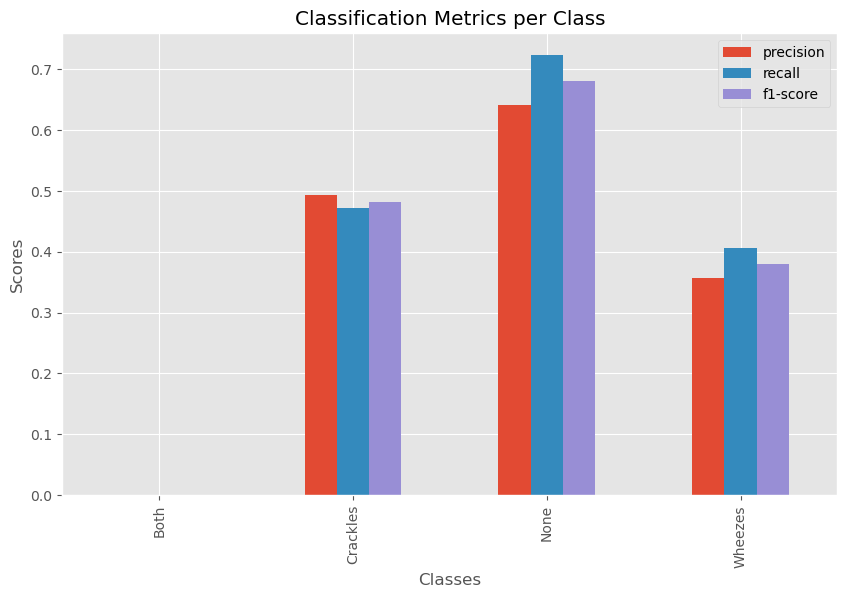

In [51]:
helperFunctions.plotClassificationAndConfusion(denseRnnModel, [mfccTest, stftTest, melTest], dte)

#### Step 5.4.3: Dense Combined

In [52]:
denseCombinedModel, denseCombinedHistory = helperFunctions.trainModel(denseCombinedModel, dtr, dte, [mfccTrain, stftTrain, melTrain, mfccTrain, stftTrain, melTrain], [mfccTest, stftTest, melTest, mfccTest, stftTest, melTest])

Epoch 1/100


2023-12-05 11:44:21.983455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:44:21.984318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:44:21.985153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - ETA: 0s - loss: 1.1539 - accuracy: 0.5332

2023-12-05 11:45:17.689564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:45:17.690200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:45:17.690862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

173/173 [==============================] - 60s 307ms/step - loss: 1.1539 - accuracy: 0.5332 - val_loss: 0.9806 - val_accuracy: 0.5797 - lr: 0.0010
Epoch 2/100
173/173 [==============================] - 52s 300ms/step - loss: 0.8796 - accuracy: 0.6533 - val_loss: 0.9632 - val_accuracy: 0.6449 - lr: 0.0010
Epoch 3/100
173/173 [==============================] - 51s 298ms/step - loss: 0.7863 - accuracy: 0.6830 - val_loss: 0.8768 - val_accuracy: 0.6580 - lr: 0.0010
Epoch 4/100
173/173 [==============================] - 52s 302ms/step - loss: 0.7398 - accuracy: 0.7064 - val_loss: 1.1117 - val_accuracy: 0.5464 - lr: 0.0010
Epoch 5/100
173/173 [==============================] - 53s 308ms/step - loss: 0.6824 - accuracy: 0.7360 - val_loss: 1.1142 - val_accuracy: 0.6348 - lr: 0.0010
Epoch 6/100
173/173 [==============================] - 52s 303ms/step - loss: 0.6298 - accuracy: 0.7485 - val_loss: 1.0155 - val_accuracy: 0.5877 - lr: 0.0010
Epoch 7/100
173/173 [==============================] - 52s

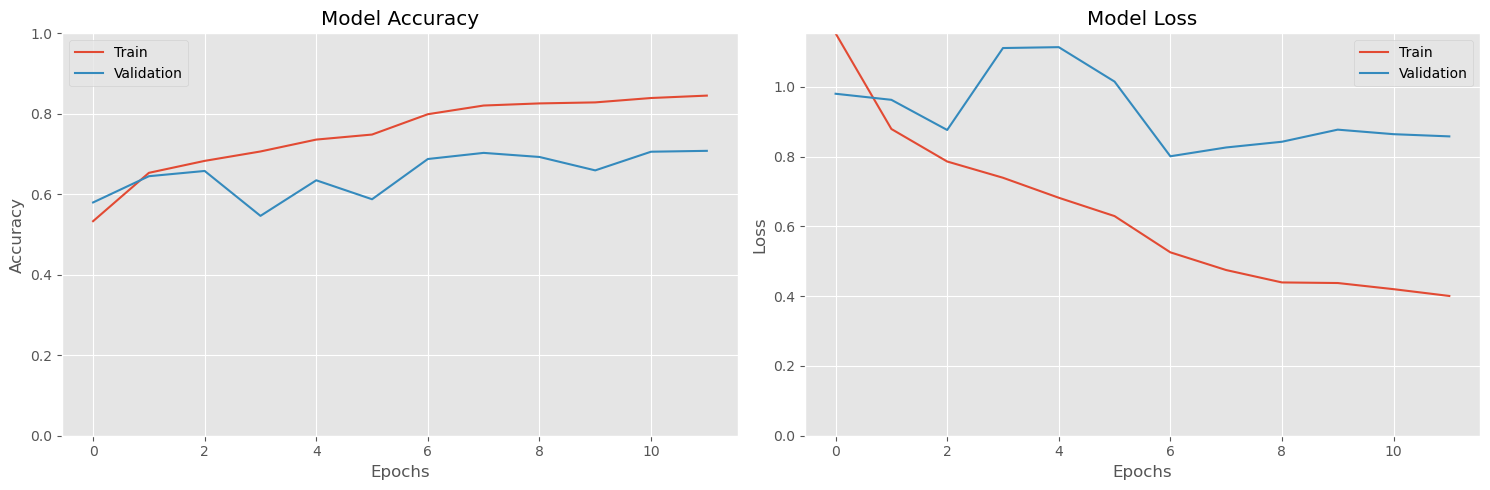

In [53]:
helperFunctions.plotModel(denseCombinedHistory)

In [54]:
denseCombinedModel.evaluate([mfccTest, stftTest, melTest, mfccTest, stftTest, melTest], dte)

44/44 [==============================] - 3s 78ms/step - loss: 0.8584 - accuracy: 0.7080


[0.8583783507347107, 0.7079710364341736]

2023-12-05 11:55:00.246257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-05 11:55:00.247497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-05 11:55:00.248369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

44/44 [==============================] - 5s 75ms/step
Confusion Matrix:
 [[ 32  27  15  27]
 [  8 247 115   3]
 [  4  84 607  34]
 [ 14  12  60  91]]


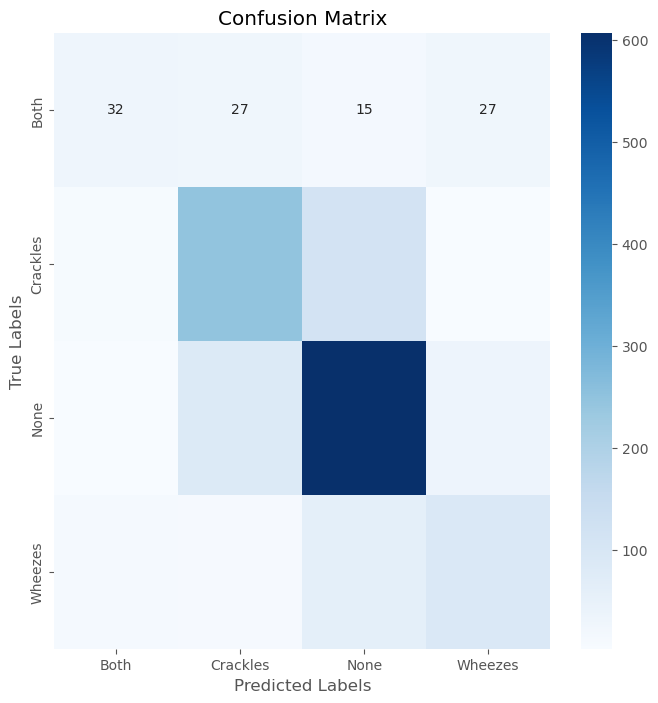

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.32      0.40       101
           1       0.67      0.66      0.66       373
           2       0.76      0.83      0.80       729
           3       0.59      0.51      0.55       177

    accuracy                           0.71      1380
   macro avg       0.64      0.58      0.60      1380
weighted avg       0.70      0.71      0.70      1380



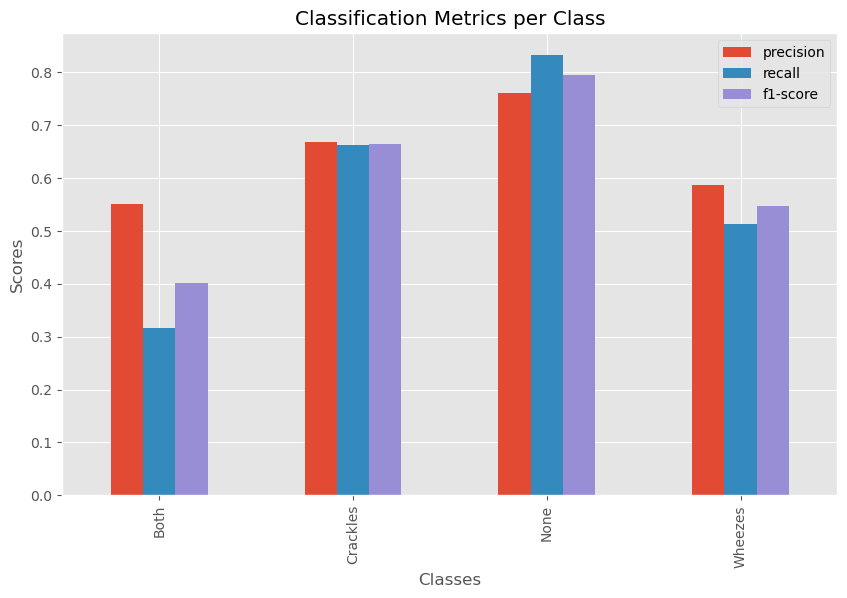

In [55]:
helperFunctions.plotClassificationAndConfusion(denseCombinedModel, [mfccTest, stftTest, melTest, mfccTest, stftTest, melTest], dte)